In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import seaborn as sns
import os
#import time
import re
import string

from PIL import Image

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Parisa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Parisa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Parisa/nltk_data...


True

In [8]:
customers_df = pd.read_csv('../data/raw/customers.csv')

In [7]:
transactions_df = pd.read_csv('../data/raw/transactions_train.csv')


In [6]:
articles_df = pd.read_csv('../data/raw/articles.csv')


In [9]:
articles_df.head(2)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


# Cleaning

### Articles DataFrame

In [10]:
articles_df.shape
print(f" articles_df's shape : {articles_df.shape}")

 articles_df's shape : (105542, 25)


In [11]:
articles_df.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


In [12]:
columns_with_neg1 = [
    'product_type_no', 'graphical_appearance_no', 'colour_group_code',
    'perceived_colour_value_id', 'perceived_colour_master_id'
]



In [13]:
# Filter rows where any column has a value of -1
rows_with_neg1 = articles_df[(articles_df == -1).any(axis=1)]
rows_with_neg1.shape[0]

830

In [14]:
articles_df.shape[0]

105542

In [15]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [16]:
#Checking for NULL in articles_df:

articles_df.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

Wr’re dealing with only 416 nulls out of 105,542, which is less than ***0.4%*** of the dataset. Since the detail_desc field is crucial for our ***NLP recommender***, it’s better to drop those rows.

In [17]:
#Drop Nulls in detail_desc

articles_df = articles_df.dropna(subset=['detail_desc']).reset_index(drop=True)
print(f"New articles_df shape after dropping nulls in detail_desc: {articles_df.shape}")

New articles_df shape after dropping nulls in detail_desc: (105126, 25)


In [18]:
#Checking for duplicates in articles_df:

print(f'Articles Duplicated columns: {articles_df.T.duplicated().any()}')

print(f'Articles Duplicated rows: {articles_df.duplicated().any()}')

print(f'Articles Total of duplicates: {articles_df.duplicated().sum()}')

Articles Duplicated columns: False
Articles Duplicated rows: False
Articles Total of duplicates: 0


## SAVE CLEANED DATA?

In [19]:
# articles_df['cleaned_prod_name'] = articles_df['prod_name'].astype(str).apply(clean_text)
# articles_df['cleaned_detail_desc'] = articles_df['detail_desc'].astype(str).apply(clean_text)

In [20]:
# articles_df.head()

### Transactions Data Frame

In [21]:
transactions_df.head(2)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2


In [22]:
transactions_df.shape

(31788324, 5)

In [23]:
transactions_df.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


In [24]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [25]:
transactions_df.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

There are no null values in transaction data frame!

In [26]:
# Converting date column data to date instead of object
transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'])

In [27]:

transactions_df.head(2)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2


Now we are able to sort data by time if needed

In [28]:
#Checking for duplicates in transactions_df:


print(f'Transactions Duplicated rows: {transactions_df.duplicated().any()}')

print(f'Transactions Total of duplicates: {transactions_df.duplicated().sum()}')



Transactions Duplicated rows: True
Transactions Total of duplicates: 2974905


Trabsactions Data Frame has duplicate rows! to be able to handle it, we'll review the the flagged rows.

In [29]:
transactions_duplicates = transactions_df[transactions_df.duplicated(keep=False)]
transactions_duplicates.head(10)

,t_dat,customer_id,article_id,price,sales_channel_id
14,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2
15,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2
17,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,671505001,0.033881,2
18,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,671505001,0.033881,2
19,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
20,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
21,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
22,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
24,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,676827002,0.042356,2
25,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,676827002,0.042356,2


Some rows in the dataset may look like duplicates at first, but they actually represent multiple quantities of the same item being purchased in a single transaction by the same customer. 
As seen above, even though the rows are identical, they’re not mistakes — they tell us that the same item was scanned more than once or purchased in multiple units. This information is important for understanding customer behavior, basket size, and item popularity.

So to maintain data integrity and accuracy, ***we will not drop these duplicate rows***.

### Customers Data Frame

In [30]:
customers_df.head(2)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...


In [31]:
customers_df.shape

(1371980, 7)

In [32]:
customers_df.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


In [33]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [34]:
customers_df.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

## SNS maybe?

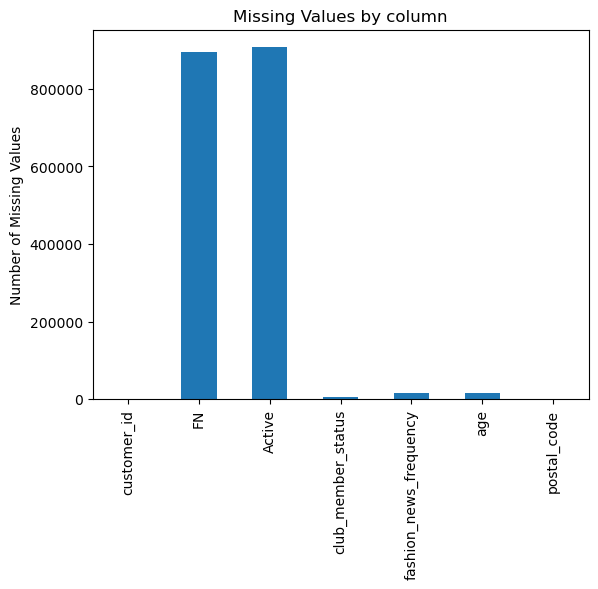

In [35]:
# Plotting Customers Missing Values:

customer_missing_values = customers_df.isna().sum()
customer_missing_values.plot(kind='bar', title='Missing Values by column')
plt.ylabel('Number of Missing Values')
plt.show()




The customers_df contains several null values across its columns. However, since this analysis focuses only on the customer_id column — which has no missing values — we won’t be exploring the other columns with nulls in detail. The recommendation system will only use the customer_id, so the missing data in other columns won't impact our results.

In [36]:
#Checking for duplicates:

print(f'Duplicated rows: {customers_df.duplicated().any()}')

print(f'Total of duplicates: {customers_df.duplicated().sum()}')

Duplicated rows: False
Total of duplicates: 0


Our Customers DataFrame doesn't have any duplicates!

## Exploratory Data Analysis (EDA)

### Customers DataFrame EDA

In [53]:
print(f"There are {customers_df.shape[0]} rows and {transactions_df.shape[1]} columns in our transactions dataframe.\n ")

There are 1371980 rows and 5 columns in our transactions dataframe.
 


In [56]:
customers_df.head(2)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...


In [57]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [58]:
customers_df.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


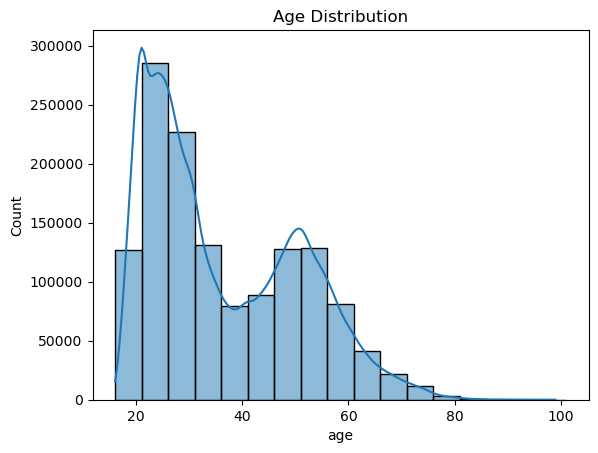

In [72]:
plt.figure()
sns.histplot(data=customers_df['age'], binwidth = 5, kde=True)
plt.title('Age Distribution')
plt.show()

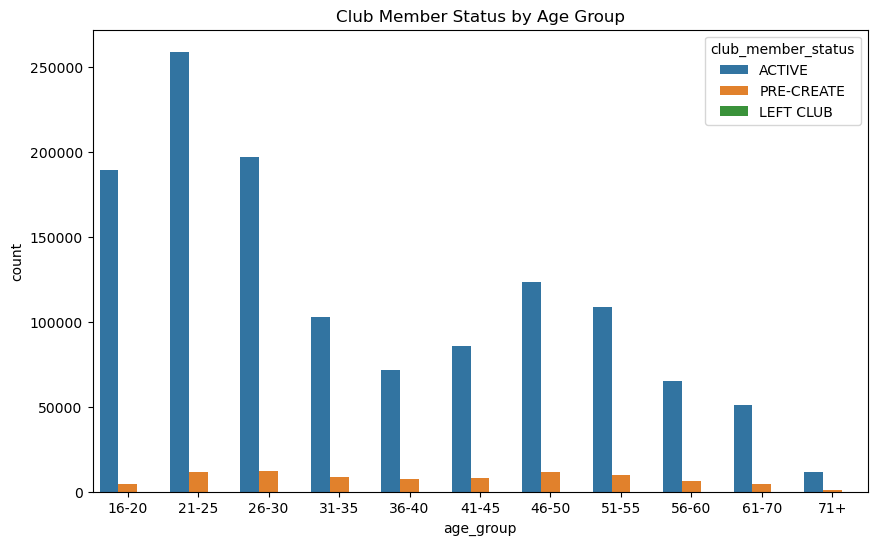

In [83]:
# Create age bins
age_bins = [16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 71, 100]
age_labels = [
    '16-20', '21-25', '26-30', '31-35', '36-40', '41-45',
    '46-50', '51-55', '56-60', '61-70', '71+']

customers_df['age_group'] = pd.cut(customers_df['age'], bins=age_bins, labels=age_labels)

# Count plot for club_member_status by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='age_group', hue='club_member_status')
plt.title("Club Member Status by Age Group")
plt.show()


### Transactions DataFrame EDA

In [73]:
print(f"There are {transactions_df.shape[0]} rows and {transactions_df.shape[1]} columns in our transactions dataframe.\n ")

There are 31788324 rows and 5 columns in our transactions dataframe.
 


In [74]:
transactions_df.head(2)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2


In [75]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


In [84]:
transactions_df.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


The price column in the transactions dataset appears to be normalized or scaled already. Here's why:

The prices range from ~0.000016 to ~0.59, which is much smaller than actual currency values you would expect in a retail dataset.

This likely indicates that:

    1- The prices were scaled down (e.g., divided by 100 or 1000) by H&M before sharing.

    2- The prices are represented as proportional values, possibly for privacy or uniformity reasons.

Because of this pre-scaling, we do not need to apply additional normalization or standardization at this stage. These values are ready to be used as input features directly for EDA, feature engineering, or modeling (e.g., as input to recommenders).



### Articles DataFrame EDA

In [85]:
print(f"There are {articles_df.shape[0]} rows and {articles_df.shape[1]} columns in our articles dataframe.\n ")

There are 105126 rows and 25 columns in our articles dataframe.
 


In [39]:
articles_df.head(2)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [40]:
articles_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105126 entries, 0 to 105125
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105126 non-null  int64 
 1   product_code                  105126 non-null  int64 
 2   prod_name                     105126 non-null  object
 3   product_type_no               105126 non-null  int64 
 4   product_type_name             105126 non-null  object
 5   product_group_name            105126 non-null  object
 6   graphical_appearance_no       105126 non-null  int64 
 7   graphical_appearance_name     105126 non-null  object
 8   colour_group_code             105126 non-null  int64 
 9   colour_group_name             105126 non-null  object
 10  perceived_colour_value_id     105126 non-null  int64 
 11  perceived_colour_value_name   105126 non-null  object
 12  perceived_colour_master_id    105126 non-null  int64 
 13 

In [109]:
product_group_counts = articles_df['product_group_name'].value_counts()
product_group_counts

<class 'pandas.core.series.Series'>
Index: 15 entries, Garment Upper body to Furniture
Series name: product_group_name
Non-Null Count  Dtype
--------------  -----
15 non-null     int64
dtypes: int64(1)
memory usage: 240.0+ bytes


In [114]:
selected_product_group = product_group_counts[product_group_counts > 10].index
selected_product_group
articles_df = articles_df[articles_df["product_group_name"].isin(selected_product_group)]
articles_df["product_group_name"].value_counts()

Garment Upper body     42593
Garment Lower body     19763
Garment Full body      13245
Accessories            11141
Underwear               5449
Shoes                   5196
Swimwear                3104
Socks & Tights          2438
Nightwear               1899
Unknown                  121
Underwear/nightwear       54
Cosmetic                  49
Bags                      25
Items                     17
Furniture                 13
Name: product_group_name, dtype: int64

We analyzed the distribution of product_group_name in the articles dataset. Some categories had fewer than 10 items ("Fun", "Stationery", "Interior textile" and "Garment and Shoe care "), which are either out of scope for a fashion recommender or too rare to extract meaningful patterns. To reduce noise and improve model quality, we removed these rare product groups.

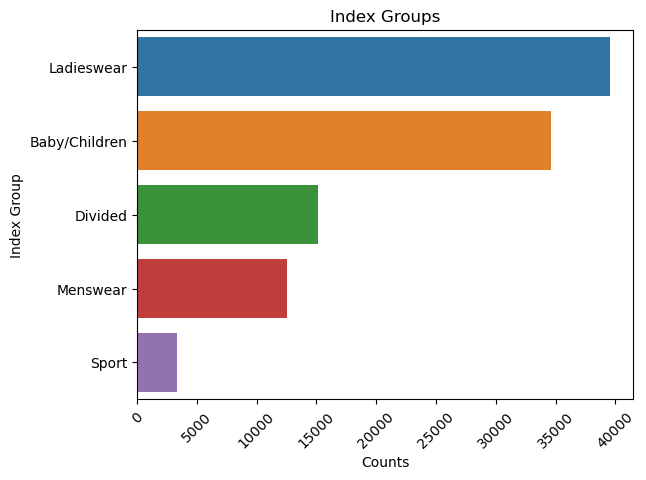

In [188]:
index_group_name_counts = articles_df['index_group_name'].value_counts()

plt.figure()
sns.barplot(x=index_group_name_counts, y=index_group_name_counts.index)

plt.xticks(rotation=45)
plt.xlabel("Counts")
plt.ylabel("Index Group")
plt.title("Index Groups")

plt.show()

In [124]:
articles_df["product_type_name"].value_counts().tail(20)

Backpack                  6
Straw hat                 6
Sleep Bag                 6
Alice band                6
Cross-body bag            5
Mobile case               4
Moccasins                 4
Chem. cosmetics           3
Baby Bib                  3
Braces                    3
Tote bag                  2
Eyeglasses                2
Wireless earphone case    2
Hairband                  2
Shoulder bag              2
Headband                  1
Pre-walkers               1
Bumbag                    1
Bra extender              1
Keychain                  1
Name: product_type_name, dtype: int64

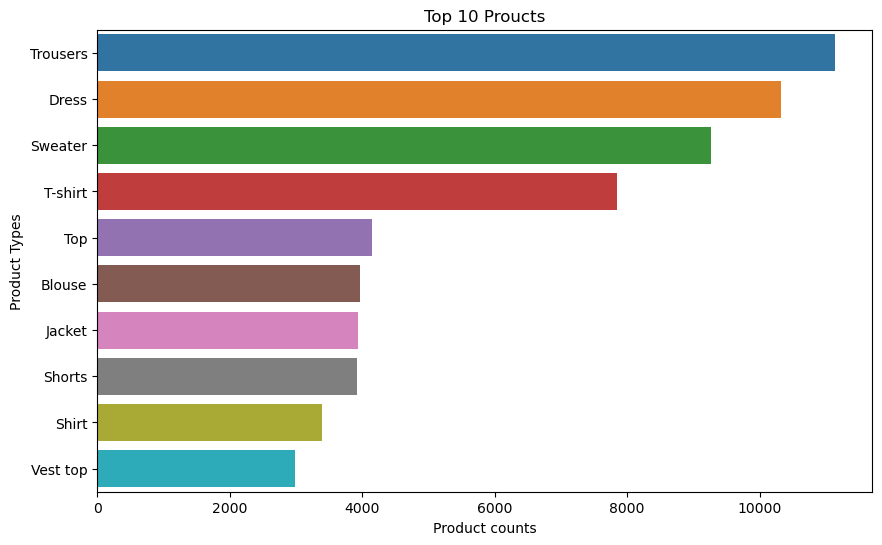

In [51]:
top_10_products = articles_df['product_type_name'].value_counts().head(10)


plt.figure(figsize=(10,6))
sns.barplot(x=top_10_products.values, y=top_10_products.index)

# plt.xticks(rotation=90)
plt.xlabel("Product counts")
plt.ylabel("Product Types")
plt.title("Top 10 Proucts")
plt.show()

We examined the most common product types in the dataset. The top 10 most frequent items include essential wardrobe staples such as trousers, dresses, sweaters, and T-shirts. These categories dominate the dataset, with trousers being the most represented, followed by dresses and sweaters.

This distribution suggests that H&M’s product offerings are heavily focused on casual and core apparel, which may influence customer purchase behavior and should be considered in the recommendation logic.

<!-- Since these product types are well-represented, they provide a solid foundation for both collaborative filtering models (due to their frequency) and content-based approaches (with ample data to extract features from descriptions, prices, or style details). -->

In [128]:
articles_df['detail_desc'].value_counts().head(10)

T-shirt in printed cotton jersey.                                                      159
Leggings in soft organic cotton jersey with an elasticated waist.                      138
T-shirt in soft, printed cotton jersey.                                                137
Socks in a soft, jacquard-knit cotton blend with elasticated tops.                     136
Fine-knit trainer socks in a soft cotton blend with elasticated tops.                  134
Socks in a soft, fine-knit cotton blend with elasticated tops.                         118
Sunglasses with plastic frames and UV-protective, tinted lenses.                       117
Boxer shorts in a cotton weave with an elasticated waist, long legs and button fly.    104
Tights in a soft, fine-knit cotton blend with an elasticated waist.                     97
Fine-knit socks in a soft cotton blend.                                                 97
Name: detail_desc, dtype: int64

In [145]:
# Adjust display to show full description text
pd.set_option('display.max_colwidth', None)

unique_descriptions = articles_df['detail_desc'].unique()

print(f"Total unique description: {len(unique_description)}")

unique_descriptions_series = pd.Series(unique_descriptions)
sample_description = unique_descriptions_series.sample(10, random_state=42)
for i, desc in enumerate(sample_description, 1):
    print(f"{i},{desc}\n")

Total unique description: 43391
1,Pile-lined jacket in imitation suede with a pile-lined stand-up collar with a fastening. Zip down the front and open front pockets.

2,Jacket in Tencel™ lyocell twill with rounded lapels, a drawstring at the waist, a concealed press-stud fastening at the front and long sleeves. Unlined.

3,Fitted vest top in ribbed jersey in a narrow cut at the top.

4,Short sports tights in fast-drying functional fabric with a wide waistband to hold in and shape the waist. Concealed key pocket in the waistband.

5,Top in sweatshirt fabric with a lined drawstring hood, and text print on the front. Long sleeves, a kangaroo pocket, and ribbing at the cuffs and hem. Soft brushed inside.

6,5-pocket, high-waisted, ankle-length jeans in washed cotton denim with hard-worn details. Sewn-on belt with metal rings, a zip fly and concealed hook-and-eye fastener, and straight legs.

7,Blouse in woven fabric with a small stand-up collar with buttons at the back of the neck, a cut-o

Since our NLP recommender system will rely heavily on product descriptions, it’s important to explore and clean the detail_desc column to ensure high-quality input for embeddings and downstream tasks.

In [151]:
articles_df['desc_length'] = articles_df['detail_desc'].str.len()
articles_df['desc_length'].describe()

count    105107.000000
mean        142.137879
std          68.059697
min          11.000000
25%          94.000000
50%         132.000000
75%         178.000000
max         764.000000
Name: desc_length, dtype: float64

The average description is about 142 characters long, which is reasonable for capturing useful product information.

The shortest description is just 11 characters, and the longest is 764 characters.

Most descriptions (50%) are between 94 and 178 characters long.

A few descriptions are quite short (under 20), which might lack enough context for semantic comparison.

In [173]:
# Initialize the stopwords list:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#Creating custom tokenizer function:

def text_cleaner(text):

    if not isinstance(text, str):

        return ""
    
    # Lowercasing
    text = text.lower()

    # Removing Numbers
    text = re.sub(r'\d+', '', text)

    # Removing punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
     
    # Splitting into words
    words = text.split()

    #
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]

    # Removing stopwords
    words = [word for word in words if word not in stop_words and word]

    # Reconstructing the sentence
    cleaned_text = ' '.join(words)

    return cleaned_text



In [189]:
# Apply to dataset
articles_df['preprocessed_desc'] = articles_df['detail_desc'].apply(text_cleaner)


In [219]:
from collections import Counter
from wordcloud import WordCloud

def plot_top_words(group_desc, title):
    word_counter = Counter()
    

    for desc in group_desc:
        word_counter.update(desc.split())

    most_common_words = word_counter.most_common(10)

    words = [word for word, count in most_common_words]
    counts = [count for word, count in most_common_words]

    plt.figure()
    sns.barplot(x=words, y=counts)
    plt.xticks(rotation=45)
    plt.xlabel("Most Common Words")
    plt.ylabel("Counts")
    plt.title(f"Most Common Words in {title}'s Descriptions \n")
    plt.show()

    # all_text = " ".join(group_desc)
    # wordcloud = WordCloud(width=800, height=400).generate(all_text)

    # plt.figure()
    # plt.imshow(wordcloud, interpolation='bilinear')
    # plt.axis("off")
    # plt.title(f"Word Cloud for {title}")
    # plt.show()
    

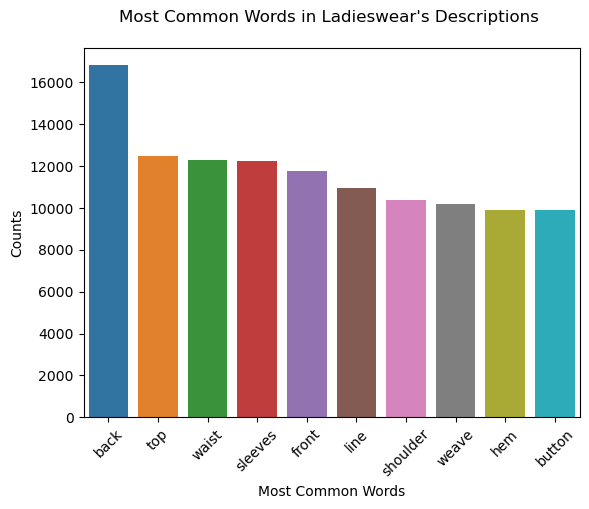

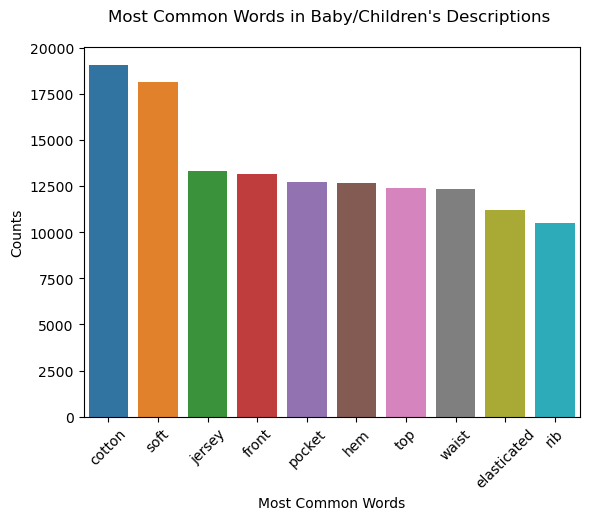

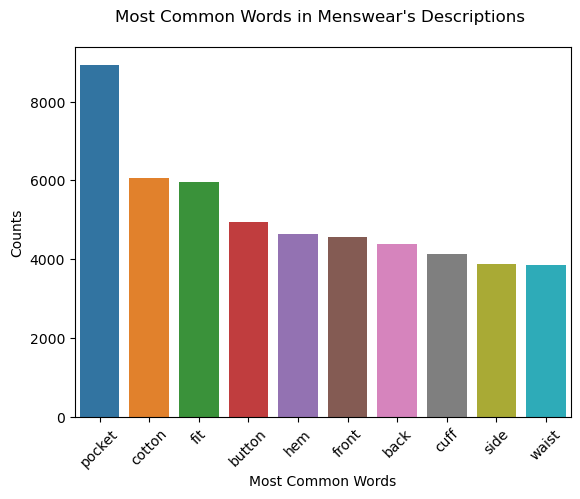

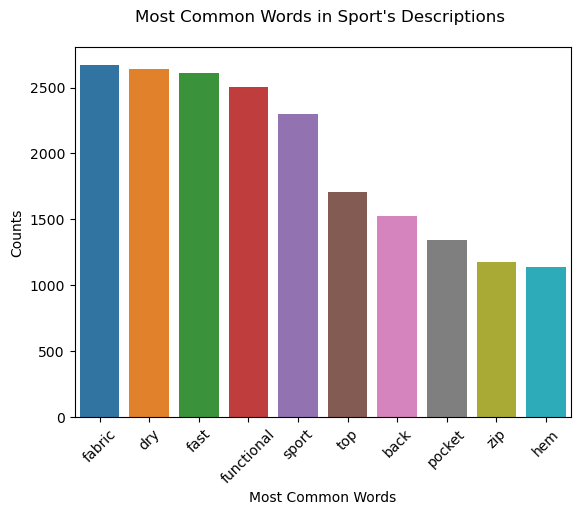

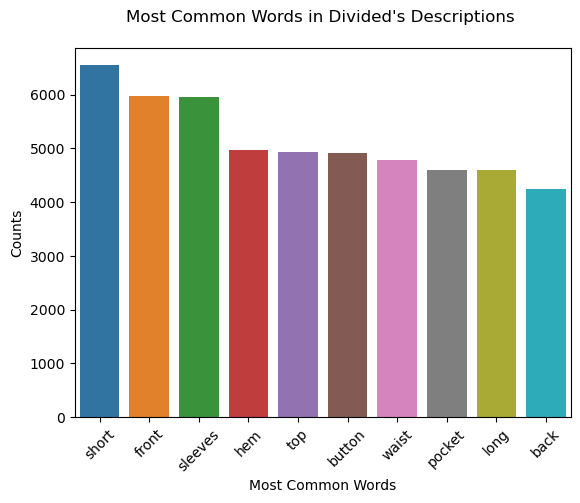

In [220]:
index_groups = articles_df['index_group_name'].unique()

for each_index in index_groups:
    group_desc = articles_df[articles_df['index_group_name'] == each_index]['preprocessed_desc']

    plot_top_words(group_desc, each_index)
    